In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df=pd.read_csv("Sugarcane Production.csv")

In [87]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [88]:
df.shape

(103, 7)

### Data cleaning

In [89]:
df=df.drop("Unnamed: 0", axis=1)

In [90]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [91]:
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production(per/Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [92]:
df.head()

,Country,Continent,Production(Tons),Production(per/Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [93]:
df['Production(Tons)']=df['Production(Tons)'].str.replace(".","")
df['Production(per/Kg)']=df['Production(per/Kg)'].str.replace(".","").str.replace(",",".")
df['Acreage(Hectare)']=df['Acreage(Hectare)'].str.replace(".","")
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].str.replace(".","").str.replace(",",".")

In [94]:
df.head()

,Country,Continent,Production(Tons),Production(per/Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [95]:
df.isnull().sum()

Country               0
Continent             0
Production(Tons)      0
Production(per/Kg)    0
Acreage(Hectare)      1
Yield(Kg/Hectare)     1
dtype: int64

In [96]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production(per/Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [97]:
df=df.dropna().reset_index().drop("index",axis=1)

In [98]:
df.shape

(102, 6)

In [99]:
df.dtypes

Country               object
Continent             object
Production(Tons)      object
Production(per/Kg)    object
Acreage(Hectare)      object
Yield(Kg/Hectare)     object
dtype: object

In [118]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production(per/Kg)']=df['Production(per/Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)

In [135]:
df.dtypes
df2=df.copy()

### Univariate Analysis

### How many countries produce sugarcane in each continent

In [120]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [121]:
df.describe()

,Production(Tons),Production(per/Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


#### Distribution of each variable

C:\Users\Ramtej\AppData\Local\Temp\ipykernel_24280\3739811818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\Ramtej\AppData\Local\Temp\ipykernel_24280\3739811818.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(per/Kg)"])
C:\Users\Ramtej\Ap

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

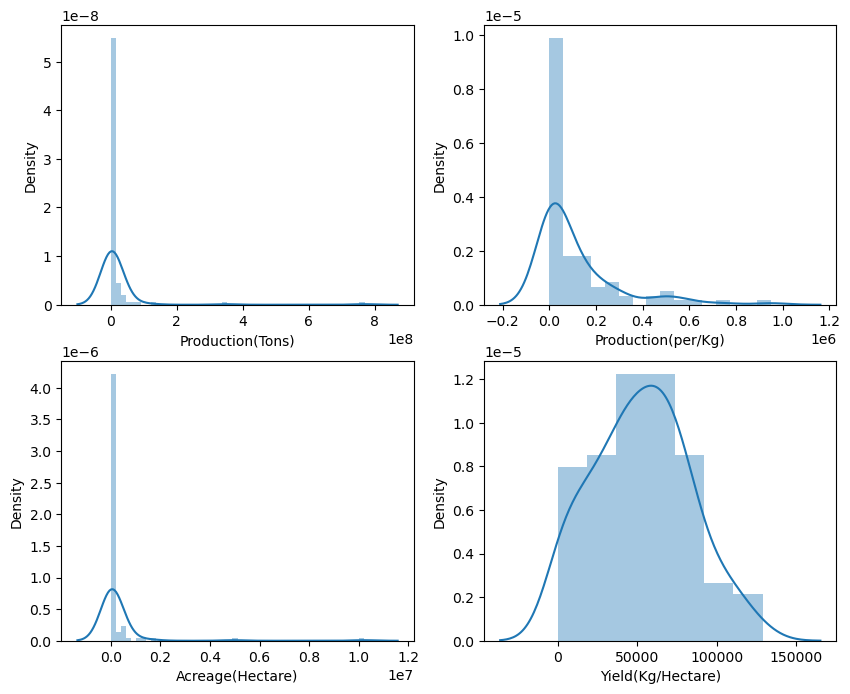

In [122]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production(per/Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

### which country produces more sugarcane

In [123]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")

In [124]:
df_new["Percentages"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

<Axes: ylabel='Percentages'>

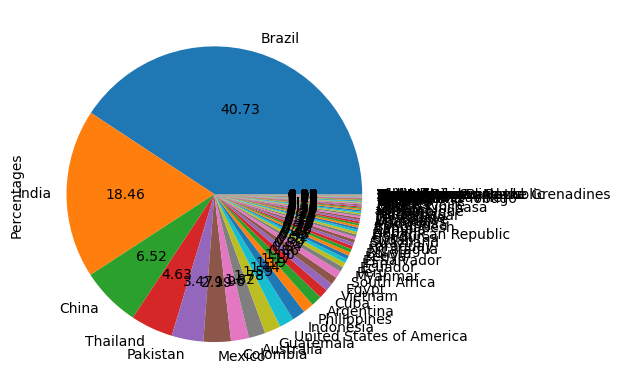

In [125]:
df_new["Percentages"].plot(kind="pie",autopct="%.2f")

#### Brazil and india produces almost 60 




percentage of sugarcane

<Axes: xlabel='Country'>

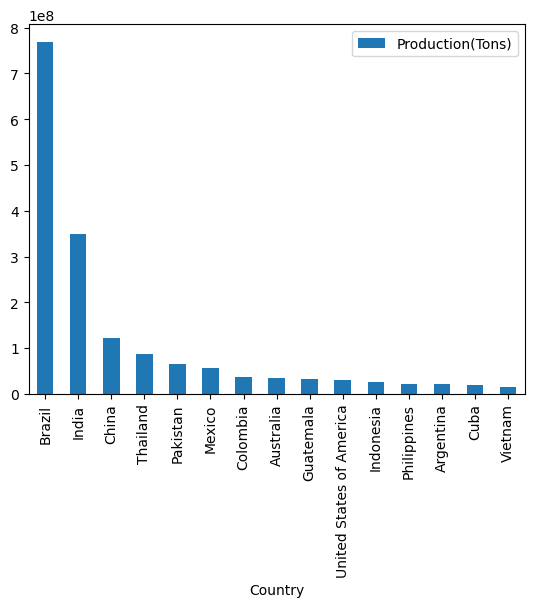

In [126]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values(by="Production(Tons)",ascending=False).head(15).plot(kind="bar")

In [127]:
df_sug=df.sort_values("Production(Tons)",ascending=False)

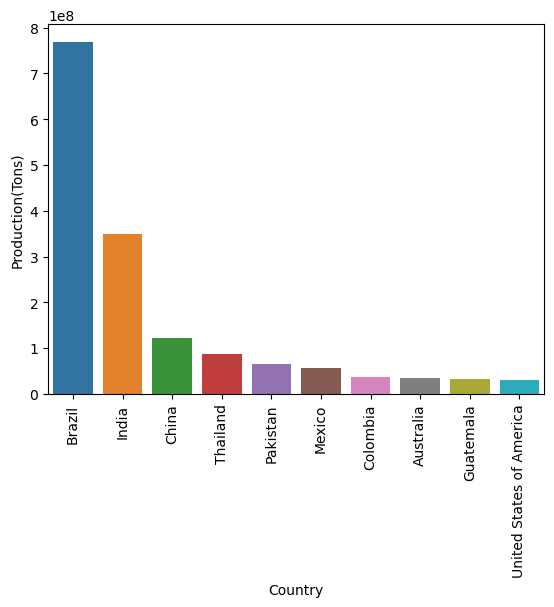

In [128]:
ax=sns.barplot(data=df_sug.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### which country has the highest land

In [129]:
df_land=df.sort_values("Acreage(Hectare)",ascending=False)

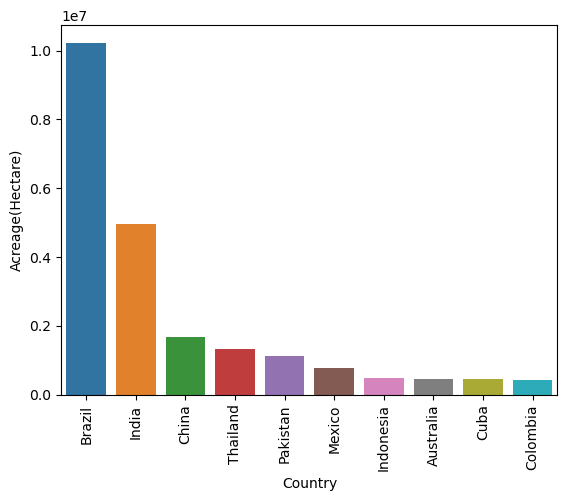

In [130]:
ax=sns.barplot(data=df_land.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Brazil and India has more sugarcane land

### which country has the highest  Yield kg per hectare

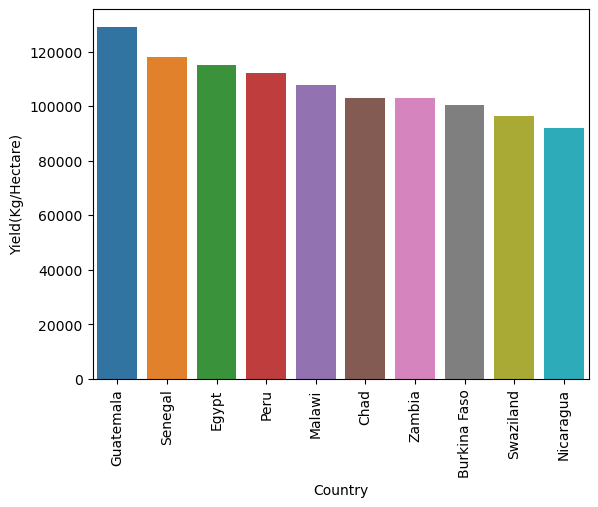

In [131]:
df_yield=df.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

##### Guatemala and Senegal has the highest Yield

### which country has the highest production per kg

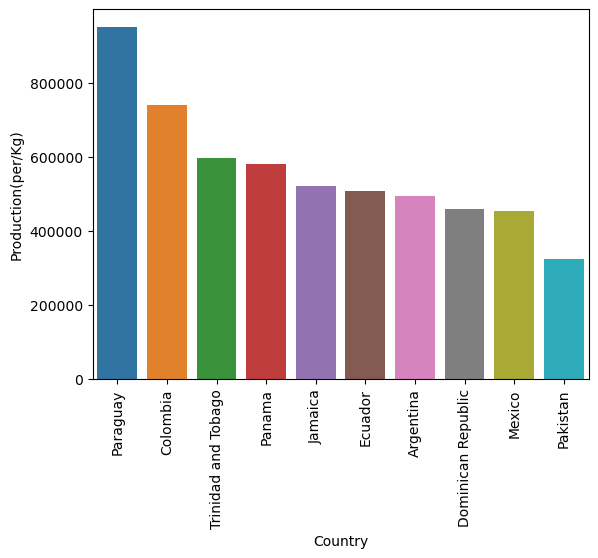

In [132]:
df_prod=df.sort_values("Production(per/Kg)",ascending=False)
ax=sns.barplot(data=df_prod.head(10),x="Country",y="Production(per/Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

##### paraguay and colombial ahs the hie=ghest production per kg

In [133]:
df.head()

,Country,Continent,Production(Tons),Production(per/Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [138]:
x=df2[["Production(Tons)","Production(per/Kg)","Acreage(Hectare)","Yield(Kg/Hectare)"]].corr()

<Axes: >

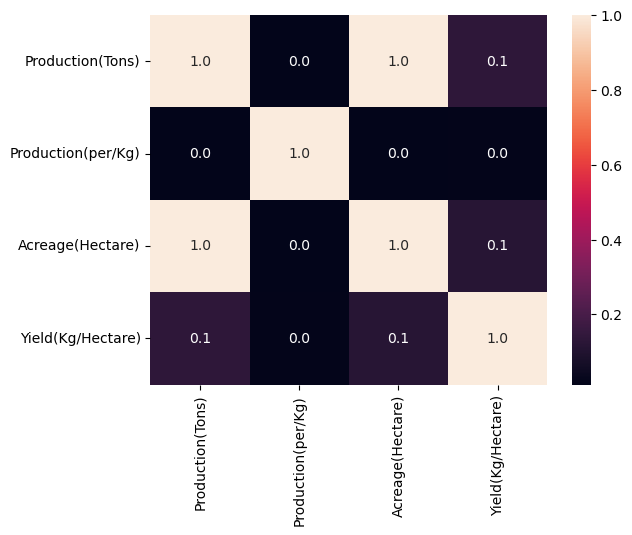

In [144]:
sns.heatmap(x,annot=True,fmt=".1f")

### Do countries with highest land produce nore sugar

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

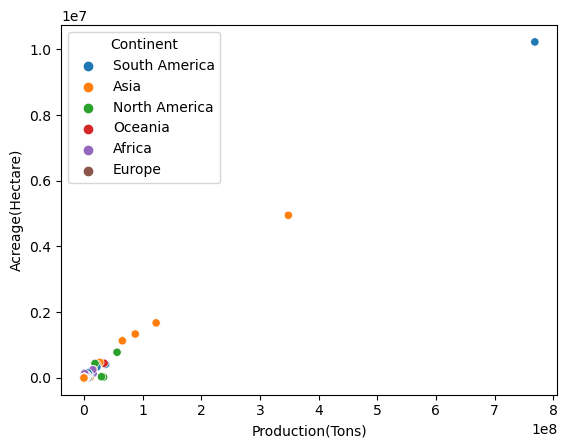

In [150]:
sns.scatterplot(data=df,x="Production(Tons)",y="Acreage(Hectare)",hue="Continent")

#### Yes countries with highest land produces more sugarcane

### Do countries with more yield produce more sugarcane

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

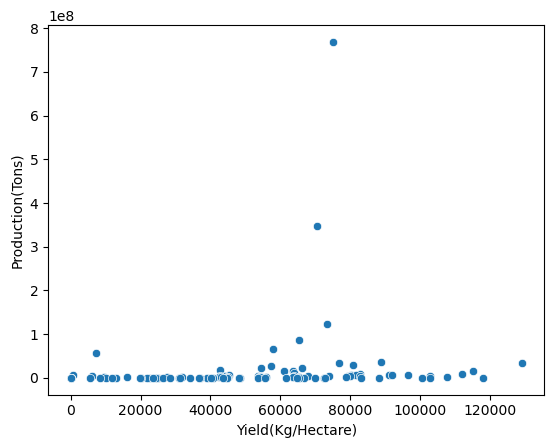

In [153]:
sns.scatterplot(data=df,y="Production(Tons)",x="Yield(Kg/Hectare)")

#### No, there is no relation between production(tons) and Yield(Kg/Hectare)

### Analysis on Continent

In [170]:
df_continent=df.groupby("Continent").sum()
df_continent.head()

,Country,Production(Tons),Production(per/Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1


In [171]:
df_continent['No_of_Countries']=df.groupby("Continent").count()["Country"]

In [172]:
df_continent.head()

,Country,Production(Tons),Production(per/Kg),Acreage(Hectare),Yield(Kg/Hectare),No_of_Countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4


### which continent produces more sugarcane

<Axes: xlabel='Continent'>

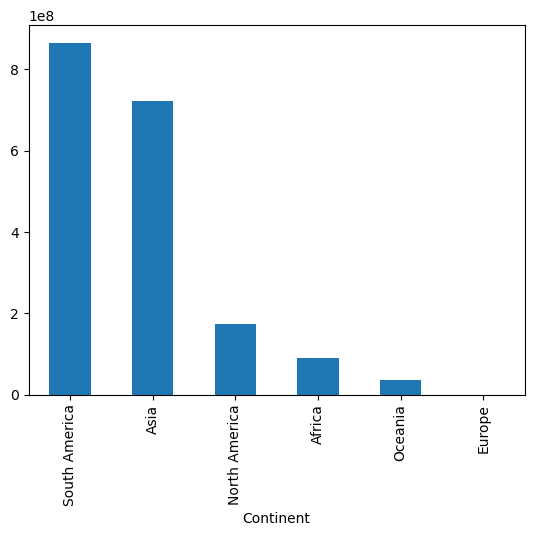

In [173]:
df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

#### South america and Asia continents produces more sugarcane

### Do number of countries in continent effects production of sugarcane

In [174]:
continent_names=df_continent.index.to_list()

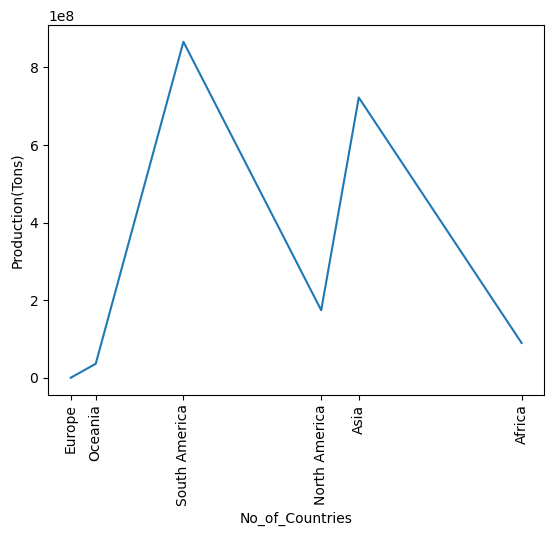

In [175]:
sns.lineplot(data=df_continent,x="No_of_Countries",y="Production(Tons)")
plt.xticks(df_continent["No_of_Countries"],continent_names,rotation=90)
plt.show()

#### NO,the continent South America produces more sugarcane even it has less countries than asia and africa

In [176]:
df_continent=df_continent.drop("Country",axis=1)
y=df_continent.corr()

<Axes: >

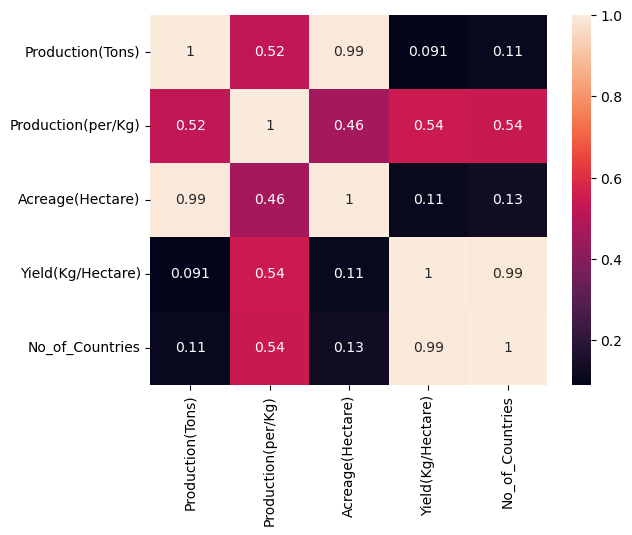

In [177]:
sns.heatmap(y,annot=True)

### Do continents with highest land produces more sugarcane

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

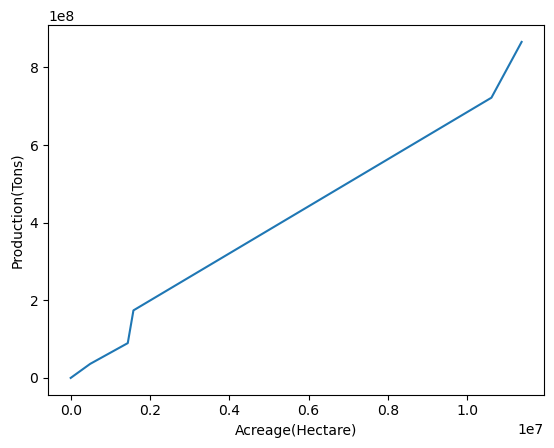

In [178]:
sns.lineplot(data=df_continent,x="Acreage(Hectare)",y="Production(Tons)")

### Production Distribution by Continent

<Axes: ylabel='Production(Tons)'>

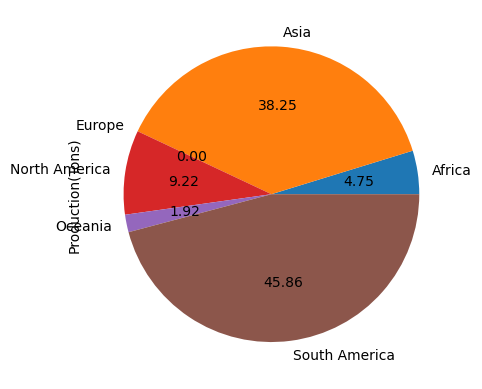

In [180]:
df_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")

#### South America and Asian continents have more production of sugarcane